<h1> NUMBER IDENTIFIER PROJECT </h1>
<h3> Started February 28, 2022 and completed March 3, 2022 </h3>

<p> The goal of this project is to train a neural network that can recognize the digits 0-9 </p>
<p> This machine learning project is based on the MNIST dataset, which are 28 pixel by 28 pixel black/white images of digits 0-9. </p>
<p> Uses pytorch library to gain access to operations that make programming a neural network easier and matplotlib to display results </p>


In [ ]:
import torch
import torch.nn as nn
import torchvision
import numpy as np
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split, Subset
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import random
from tqdm import tqdm

In [ ]:
# Creating a dataset and dataloader for the MNIST dataset

def load_mnist(batch_size=32, train=True):

    to_tensor_transform = torchvision.transforms.ToTensor()


    dataset = torchvision.datasets.MNIST(r'C:\Users\surya\UMass Amherst\CS389\Homework 3\data_hw3', train, to_tensor_transform, download=True)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size) #This creates an object that will help organize our data into batches
    return dataset, dataloader

In [ ]:
def plot_image_and_label(image, label):

    '''
    Takes in an image and label and shows them using matplotlib
    this is used to visualize the data and also the outputs of our network
    '''

    plt.imshow(image)
    if type(label) is not int:
        _,predicted = torch.max(label,1)
        plt.title("Best label = " + str(predicted.item()) + ", with Score: " + str(round(label[0][predicted].item() * 100,2)))
    else:
        plt.title("Label = " + str(label))
    plt.show()
    return

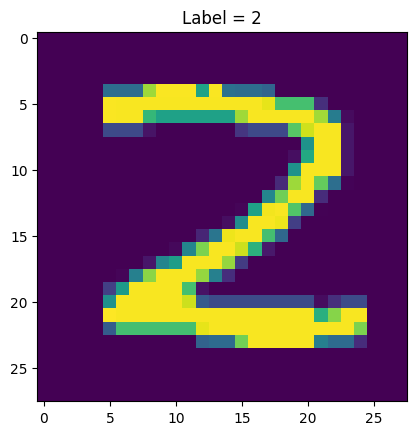

In [ ]:
# A test to make sure the data loaded correctly

train_dataset, train_dataloader = load_mnist(batch_size=1, train=True)
ex_image, ex_label = train_dataset[random.randint(0,1000)]
plot_image_and_label(ex_image.reshape(28,28), ex_label)

Pytorch is built off of modules (called ```nn.Module```) which consist of 2 parts: The initialization (defined in ```__init__()``` -- note that this the python convention for initalizing classes) and the forward pass (defined aptly as ```forward()```)

The first attempt at making the model will revolve around a single-layer perceptron, which is a single linear layer that takes in a flattened image. It's output will be a row of 10 probability scores, where each score corresponds to the likelihood of the image being eachone of the 10 digits. The highest probability score will be the prediction of the model

**Let's see how the single-layer perceptron does!**

To build a single layer perceptron, we can use the constructor `nn.Linear(size_of_input,size_of_output)` to create a Pytorch object for a simple linear layer. Try it below!





In [ ]:
class MyPerceptron(nn.Module):
    # Defines the layers used in the neural network along with other variables
    def __init__(self, input_size, output_size):
        super(MyPerceptron, self).__init__()

        self.input_size = input_size

        # TODO use nn.Linear(....) to create an attribute of self to store a linear layer
        ######################################

        ######################################
    # Passes the input data x through a series of layers defined in __init__. The variable outputted at the end of this series is the prediction, which is returned
    def forward(self, x):

        x = x.view(-1, self.input_size) # this is how you flatten the image to fit into your linear layer. You don't have to change this line.

        # TODO call the linear layer you created above as though it's a function. The input should be x.
        # return the output of caling your linear layer
        ######################################


        ######################################

TypeError: max() received an invalid combination of arguments - got (NoneType, int), but expected one of:
 * (Tensor input, *, Tensor out = None)
 * (Tensor input, Tensor other, *, Tensor out = None)
 * (Tensor input, int dim, bool keepdim = False, *, tuple of Tensors out = None)
 * (Tensor input, name dim, bool keepdim = False, *, tuple of Tensors out = None)


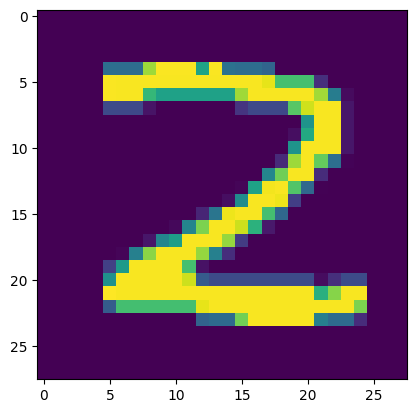

In [ ]:
# This takes our randomly initialized perceptron and sees its prediction on a random input from MNIST
test_model = MyPerceptron(784, 10)
test_output = test_model(ex_image.flatten())

plot_image_and_label(ex_image.reshape(28,28), test_output)


Amazing! It's not trained yet, but it can make predictions!

Let's try making a Multi-Layer Perceptron(MLP)
Since perceptrons work with linear operations, combining perceptrons would combine all the linear processes into one - still a linear operation. So this is basically the same as working with one perceptron.

The way to utilize the extra capacity of multiple layers is to have non-linear function (activation functions) between each layer in the neural network/perceptron. Having the ability to model nonlinear operations greatly improves what, and modifying more weights can be helpful when trying to find more features that can help identify the digit correctly. It will also help the network with identifying relationships between variables that aren't neccesarily linear.

In [ ]:
class MyMLP(nn.Module):


    def __init__(self, input_size, output_size):
        super(MyMLP, self).__init__()

        self.input_size = input_size # making the input size accessible
        # TODO use nn.Linear(....) to create a series of linear layers
        # Each sucsessive linear layer takes in as many values as the previous layer outputted (e.g. if the output size of layer 1 is 32, the input size of layer 2 is 32)
                # TODO perform the forward pass of you model
        # use the modules you initialized above (each should be used)
        # You should also include the self.relu between each layer (including conv2d ones)
        ######################################



        ######################################

        self.relu = nn.ReLU() # Nonlinearity between layers, this makes the model able to establish non-linear connections between variables.



    def forward(self, x):

        x = x.view(-1, self.input_size)   # This reshapes the input to work with the batches
        #Call each of your layers like functions, each on the result of the last, starting by passing x into the first layer
        #between layers, call self.relu(output_of_prev_layer)
        #store final result in variable "out"
        ###########


        return out

In [ ]:
# Shows the prediction of the model without training
# Not very good huh? (though theres a small chance it is lol)

test_model = MyMLP(784, 10)
test_output = test_model(ex_image.flatten()) # Notice how we flatten the 2d image into 1d to use the MLP

plot_image_and_label(ex_image.reshape(28,28), test_output)

Still incorrect! The reason this model doesn't yet work as intended is because it hasn't been trained yet. The training will allow the model to learn from inputs and outputs, and improve the weights in each layer. Once the weights stop changing, this means that the model has found it's optimality, and the final pass through can be done to identify the digit correctly and with more confidence.

The goal of training is to reduce the error, or "loss" of the model's predictions. The lower the loss, the more accurate the model will be. Different loss functions can be used to measure error, and the model will perform differently based on which one is implemented. In this case, `nn.CrossEntropyLoss()` will be used. `nn.CrossEntropyLoss` objects are passed the model's 10 probabilities of each number, as well as the correct answer (as a single integer). Feel free to change the loss function being used if you want to play around.


## The Training Process


*   Optimizer: an object from `torch.optim` in charge of changing the weights of your model  (usually `torch.optim.SGD or torch.optim.Adam`)
*   Loss function: PyTorch object that accepts the prediction of your model and the label of the correct prediction, and calculates the error of your model's prediction


```
for each epoch:
  for each batch of images and labels that the DataLoader gives us on one passthrough of the dataset:
    1. Reset the optimizer
    2. Use the model to make a prediction
    3. Calculate loss on your model's prediction
    4. call .backward() on the result of calculating the loss. This calculates the gradient and informs the optimizer how to change the weights
    5. call optimizer.step() to update the weights based on the gradient.

```

### A Word on Gradient Descent:
The training will be done through gradient descent, which updates the weights during the backpropogation step from the model's output/label/loss calculation back through the input, so the model can learn from the next piece of input-label data.

While it would be nice to theoretically train until the gradient doesn't change, at this point which we know the loss should be at a minimum, this can take an infinitely long time. The gradient may not change much, but it will usually always change. So we repeat this backpropogation process for a certain number of epochs, which we can control. More epochs = more training = more accurate results, but also takes longer to train.

The below code tests gradient descent with our model using CrossEntropyLoss. The gradient should be negative, as this would indicate that our loss function is decreasing, which is what we want when training our neural network.

In [ ]:
model = MyMLP(784, 10)      # Create model with input size 784 (28 by 28 images, with a 10-vector long output)
lr=0.02                     # Learning rate represents by what factor the weights should update per pass through.

## TODO Fill in the loss_function and optimizer below and run this cell to see if they are valid!
# Hint: Use CrossEntropyLoss from the nn library and Stochastic Gradient Descent (SGD) from the torch.optim library, passing in your model parameters
#############################################


#############################################


In [ ]:
# training function

def training(model, loss_function, optimizer, train_dataloader, n_epochs, update_interval):

    '''
    Updates the parameters of the given model using the optimizer of choice to
    reduce the given loss_function

    This will iterate over the dataloader 'n_epochs' times training on each batch of images

    To get the gradient (which is stored internally in the model) .backward() from the loss tensor is used, and for it to be applied
    .step() is used on the optimizer

    In between steps the gradient is zeroed so it isn't accidentally reused for the next iteration
    '''

    losses = []

    for n in range(n_epochs):
        for i, (image, label) in enumerate(tqdm(iter(train_dataloader))):

            '''
            Updates the parameters of the given model using the optimizer of choice to
            reduce the given loss_function

            This will iterate over the dataloader 'n_epochs' times training on each batch of images

            To get the gradient (which is stored internally in the model) use .backward() from the loss tensor
            and to apply it use .step() on the optimizer

            In between steps you need to zero the gradient so it can be recalculated -- use .zero_grad for this
            '''
            # TODO Complete the training loop using the instructions above
            # Hint: the above code essentially does one training step
            ##########################





            ##########################

            if i % update_interval == 0:
                losses.append(round(loss.item(), 2))

    return model, losses



In [ ]:
# Hyperparameter tuning

lr = 0.10               # The size of the step taken when doing gradient descent - initially 0.02
batch_size = 64         # The number of images being trained on at once - initially 128
update_interval = 100   # The number of batches trained on before recording loss - initially 100
n_epochs = 1            # The number of times we train through the entire dataset

train_dataset, train_dataloader = load_mnist(batch_size=batch_size, train=True)

model = MyMLP(784, 10)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

trained_model, losses = training(model, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)

plt.plot(np.arange(len(losses)) * batch_size * update_interval, losses)
plt.title("training curve")
plt.xlabel("number of images trained on")
plt.ylabel("loss")
plt.show()


In [ ]:
trained_output = trained_model(ex_image.flatten())

plot_image_and_label(ex_image.reshape(28,28), trained_output)

The number is correctly identified, and the score is high, showing that the model is very confident that its answer is correct! However, to show that the model isn't just fit to this training example, and the rest of the training data, we will have to test it.

The testing process is the same as training, except test accuracy and average loss are also calculated.

In [ ]:
def testing(model, loss_function, test_data):

    '''
    This function will test the given model on the given test_data
    it will return the accuracy and the test loss (given by loss_function)
    '''

    sum_loss = 0
    n_correct = 0
    total = 0

    for i, (image, label) in enumerate(tqdm(iter(test_data))):

        pred = model(image)
        loss = loss_function(pred, label)
        sum_loss += loss.item()

        _, predicted = torch.max(pred,1)
        n_correct += (predicted == label).sum()
        total += label.size(0)

    test_acc = round(((n_correct / total).item() * 100), 2)
    avg_loss = round(sum_loss / len(test_data), 2)

    print("test accuracy:", test_acc)
    print("test loss:", avg_loss )

    return test_acc, avg_loss


print("testing the previously trained model on test dataset of MNIST")
test_dataset, test_dataloader = load_mnist(batch_size=10000, train=False)
_,_ = testing(trained_model, loss_function, test_dataloader)

In [ ]:
def train_and_test(model, loss_function, optimizer, batch_size, update_interval, n_epochs):

    _, train_dataloader = load_mnist(batch_size=batch_size, train=True)
    trained_model, losses = training(model, loss_function, optimizer, train_dataloader, n_epochs=n_epochs, update_interval=update_interval)

    _, test_dataloader = load_mnist(batch_size=10000, train=False)
    test_acc, test_loss = testing(trained_model, loss_function, test_dataloader)

    plt.plot(np.arange(len(losses)) * batch_size * update_interval, losses, color="b", label="train loss")
    plt.hlines(test_loss, 0, len(losses) * batch_size * update_interval, color='r', label="test loss")
    plt.legend()
    plt.title("training curve")
    plt.xlabel("number of images trained on")
    plt.ylabel("loss")
    plt.show()

    return trained_model, test_loss



*Change* the hyperparameters to get the best results!

In [ ]:
# Hyperparameter tuning
#CHANGE THESE 4 NUMBERS AND SEE HOW IT IMPACTS YOUR TRAINING GRAPH
########################
lr = 0.10               # The size of the step taken when doing gradient descent
batch_size = 64        # The number of images being trained on at once
update_interval = 100   # The number of batches trained on before recording loss
n_epochs = 10            # The number of times we train through the entire dataset
#####################

model = MyMLP(784, 10)
loss_function = nn.CrossEntropyLoss()#Change this if you want
optimizer = torch.optim.SGD(model.parameters(), lr=lr)#Change this if you want

_, _ = train_and_test(model, loss_function, optimizer, batch_size=batch_size, update_interval=update_interval, n_epochs=n_epochs)

The testing loss ends up being about the same as the training loss, showing that the model is not overfit - it is accurate with both training and testing data.

# Convolutional Neural Network (CNN)

In [ ]:
class MyCNN(nn.Module):

    def __init__(self, input_size, output_size):
        super(MyCNN, self).__init__()

        self.input_size = input_size # making the input size accessible

        # TODO initalize your layers here
        # that makes up the model -- use nn.Conv2d : https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        # Your model can use multiple conv2d layers, but keep track of the dimensions -- they can be tricky
        # You can use more if you'd like, but you need at least 2 conv2d layers
        #Try different kernel sizes, numbers of kernels, and strides
        #the output number of kernels of one layer must == the input number of kernels of the next!
        #################################




        self.relu = nn.ReLU()       # you only need to define one relu, you can use this one

        # You need to find what size input MLP you should use (hint: find the overall size of the output of the convs)
        # Hint: How big is the output of your last layer when flattened?
        ##############
        #UNCOMMENT LINE BELOW AND ADD AN INTEGER
        #cnn_out_size = YOUR_NUMBER_HERE
        ##############

        #################################
        self.relu = nn.ReLU() #we gave you your ReLU this time

        self.lin1 = nn.Linear(cnn_out_size, output_size)
        # Add more Linear layers if you want! (recommended)
        #if you do, remember to set a different output size for your first layer!


    def forward(self, x):

        x = x.view(-1, 1, 28, 28)   # This reshapes the input to work with the batches


        #Call all of your Conv2d layers like functions, with ReLU calls in between
        #Remember to store the result in the variable "out"
        ##########################

        ##########################

        out = out.flatten()  # This is the flattening that we keep talking about (note that it will still be a batch on outputs)
        #Call all of your Linear layers like functions, with ReLU calls in between
        #Remember to store the result in the variable "out"
        ##########################

        ##########################

        return out

## Play around with your CNN!

In [ ]:
# Hyperparameter tuning
#CHANGE THESE 4 NUMBERS AND SEE HOW IT IMPACTS YOUR TRAINING GRAPH
########################
lr = 0.10               # The size of the step taken when doing gradient descent
batch_size = 64        # The number of images being trained on at once
update_interval = 100   # The number of batches trained on before recording loss
n_epochs = 10            # The number of times we train through the entire dataset
#####################

model = MyCNN(784, 10)
loss_function = nn.CrossEntropyLoss()#Change this if you want
optimizer = torch.optim.SGD(model.parameters(), lr=lr)#Change this if you want

_, _ = train_and_test(model, loss_function, optimizer, batch_size=batch_size, update_interval=update_interval, n_epochs=n_epochs)